In [1]:
import pandas as pd 
import numpy as np 
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
data = pd.read_csv('Champagne.csv')
data.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [3]:
dates = pd.date_range(start='1964-01-01', freq='MS', periods=len(data))
dates[0:5]

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [4]:
data.set_index(dates,inplace=True)

In [5]:
sales_ts = data['Sales']
sales_ts[0:5]

1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Freq: MS, Name: Sales, dtype: int64

In [6]:
data = pd.DataFrame(sales_ts.copy())
data.head()

,Sales
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [7]:
# Splitting Train and Test Length
train_len = int(np.ceil(len(data) * 0.75))

In [8]:
train=data[0:train_len] 
test=data[train_len:]
print('Train data length :',len(train))
print('Test  data length :',len(test))

Train data length : 79
Test  data length : 26


In [9]:
x_train = train.drop('Sales', axis=1)
x_test = test.drop('Sales', axis=1)
y_train = train[['Sales']]
y_test = test[['Sales']]

In [10]:
y_hat_avg = test.copy()

In [11]:
fit1 = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.05574986291458101,
 'smoothing_slope': 1.443911683751581e-12,
 'smoothing_seasonal': 0.9053845872345992,
 'damping_slope': nan,
 'initial_level': 3339.9105862162864,
 'initial_slope': 22.2445016461074,
 'initial_seasons': array([ -630.65411606,  -773.57658123,  -687.91626227,  -723.9294304 ,
         -501.55137492,  -421.01244496, -1174.51840923, -1257.20818584,
         -539.11320431,   832.32560022,  2298.17467999,  3838.99033183]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [12]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

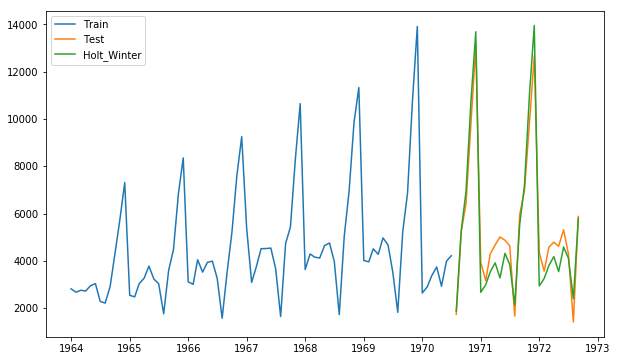

In [13]:
plt.figure(figsize=(10,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [14]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.Sales, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)

In [15]:
# Mean Absolute Percentage Error
abs_error = np.abs(y_test['Sales']-y_hat_avg.Holt_Winter)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)

In [16]:
print(rmse)

821.475
